In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Import dependencies 
import requests
from config import weather_api_key
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key
    city_url = url + "&q=" + city.replace(" ","+")

    # Log thr url, record, and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record
    record_count+= 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | strezhevoy
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | huanren
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | salinas
Processing Record 6 of Set 1 | vanimo
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | hofn
Processing Record 10 of Set 1 | liaoyang
Processing Record 11 of Set 1 | sisimiut
Processing Record 12 of Set 1 | mergui
City not found. Skipping...
Processing Record 13 of Set 1 | yulara
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | luganville
Processing Record 20 of Set 1 | haines junction
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | taolanaro
City not fou

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Strezhevoy,60.7333,77.5889,33.78,98,100,5.28,RU,2021-09-21 20:26:40
1,Jamestown,42.0970,-79.2353,74.01,70,75,4.00,US,2021-09-21 20:26:41
2,Huanren,41.2647,125.3667,56.37,97,100,4.09,CN,2021-09-21 20:26:41
3,Ponta Do Sol,32.6667,-17.1000,74.03,72,72,5.19,PT,2021-09-21 20:26:41
4,Salinas,36.6777,-121.6555,102.56,32,1,10.36,US,2021-09-21 20:22:43


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Strezhevoy,RU,2021-09-21 20:26:40,60.7333,77.5889,33.78,98,100,5.28
1,Jamestown,US,2021-09-21 20:26:41,42.0970,-79.2353,74.01,70,75,4.00
2,Huanren,CN,2021-09-21 20:26:41,41.2647,125.3667,56.37,97,100,4.09
3,Ponta Do Sol,PT,2021-09-21 20:26:41,32.6667,-17.1000,74.03,72,72,5.19
4,Salinas,US,2021-09-21 20:22:43,36.6777,-121.6555,102.56,32,1,10.36


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

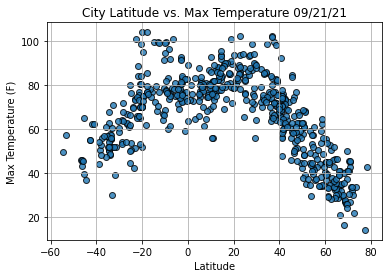

In [25]:
import time
# scatter plot for latitude vs temp
plt.scatter(lats,
            max_temps,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig1.png")
plt.show()


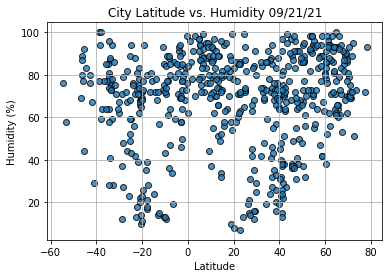

In [27]:
# scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig2.png")
plt.show()

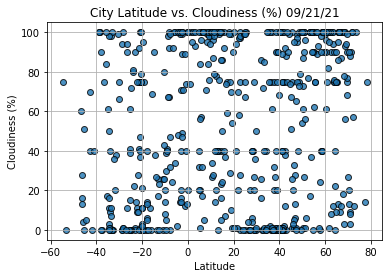

In [30]:
# scatter plot for latitude vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


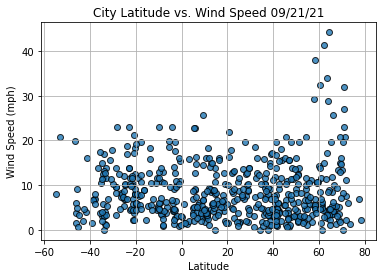

In [33]:
# scatter plot for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/Fig4.png")
plt.show()

In [40]:
index13 = city_data_df.loc[13]
index13

City                   Codrington
Country                        AU
Date          2021-09-21 20:26:44
Lat                      -38.2667
Lng                      141.9667
Max Temp                     50.7
Humidity                       94
Cloudiness                    100
Wind Speed                   6.96
Name: 13, dtype: object

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
# apply loc methon to city data DF on the Lat column to get lats greater than 0 
#northern hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

#apply loc method for southern hemisphere
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

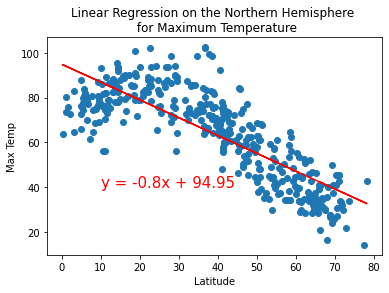

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                        'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

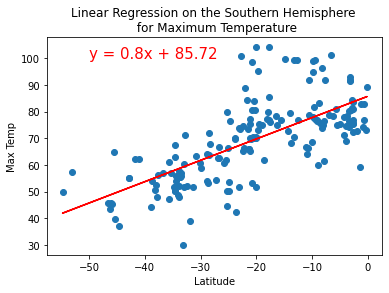

LinregressResult(slope=0.8000053926834957, intercept=85.7171127343094, rvalue=0.692436742762271, pvalue=3.5806076314386996e-27, stderr=0.06230311239632917, intercept_stderr=1.5342357598118999)

In [73]:
# Linear regression on the Southern Hemisphere for lat vs temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                        'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,100))
linregress(x_values, y_values)

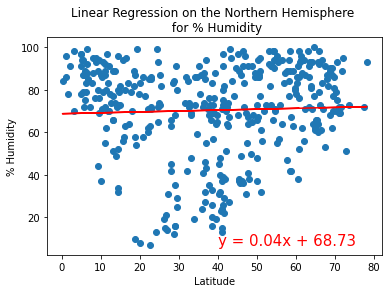

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,7))

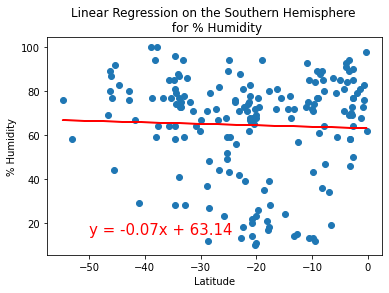

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

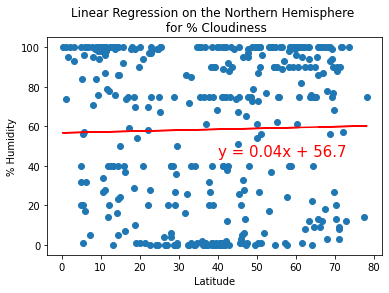

In [80]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Humidity',(40,45))

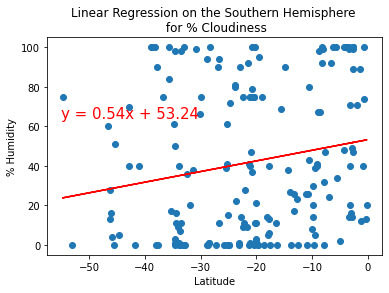

LinregressResult(slope=0.5375223950262397, intercept=53.2425280869847, rvalue=0.18819155388658224, pvalue=0.011179822257662373, stderr=0.20967175610259586, intercept_stderr=5.1632397429653105)

In [88]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Humidity',(-55,64))
linregress(x_values,y_values)

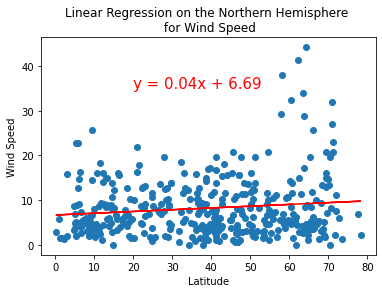

In [91]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,35))

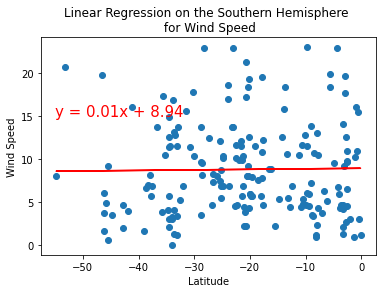

In [94]:
# Linear regression on the Southern Hemisphere for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,15))